# Simulation11

**Mengqi Liu**

**Sep 10, 2023**
___

 - Methods:
   ($\tilde{Z}$ is the discretized $Z$, and the data belonging to the same group share the same $\tilde{Z}$.)
   - "double_Z/cor_Z": permute $X$ within each bin. At each time, regress $Y$ on $1,Z$ and regress $X$ on $1,Z$ separately, and take the *absolute* *correlation* between residuals from two linear regressions as the test statistic.
   
   - "XY_meanZ": permute $X$ within each bin. At each time, regress $Y$ on $1,\tilde{Z}$ and regress $X$ on $1,\tilde{Z}$ separately, and take the *absolute* *product* between residuals from two linear regressions as the test statistic.
   
   - "cor_noZ": use $cor(X,Y)$ as test statistic with local permutation in $X$ with respect to $Z$.
   - "XY_Z": regress $Y$ on $1,Z$ and regress $X$ on $1,Z$ separately. Permute residuals from regression on for $X$ and take the *absolute* *product* between residuals as the test statistic.
   - "XY_noZ": use $X^\top Y$ as test statistic with local permutation in $X$ with respect to $Z$.

 - N = 1000, normal distribution

## Summary
    
  - M = 50: no difference in power between XY_Z and XY_meanZ

  - M = 25/10: lose type-1 error control

  - M = 10 & non-linear function: There are some signs of higher power for XY_Z, along with more stable type-1 error control

  - U-shape?

  - Next: narrow down the scale of cor?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 - M = 50

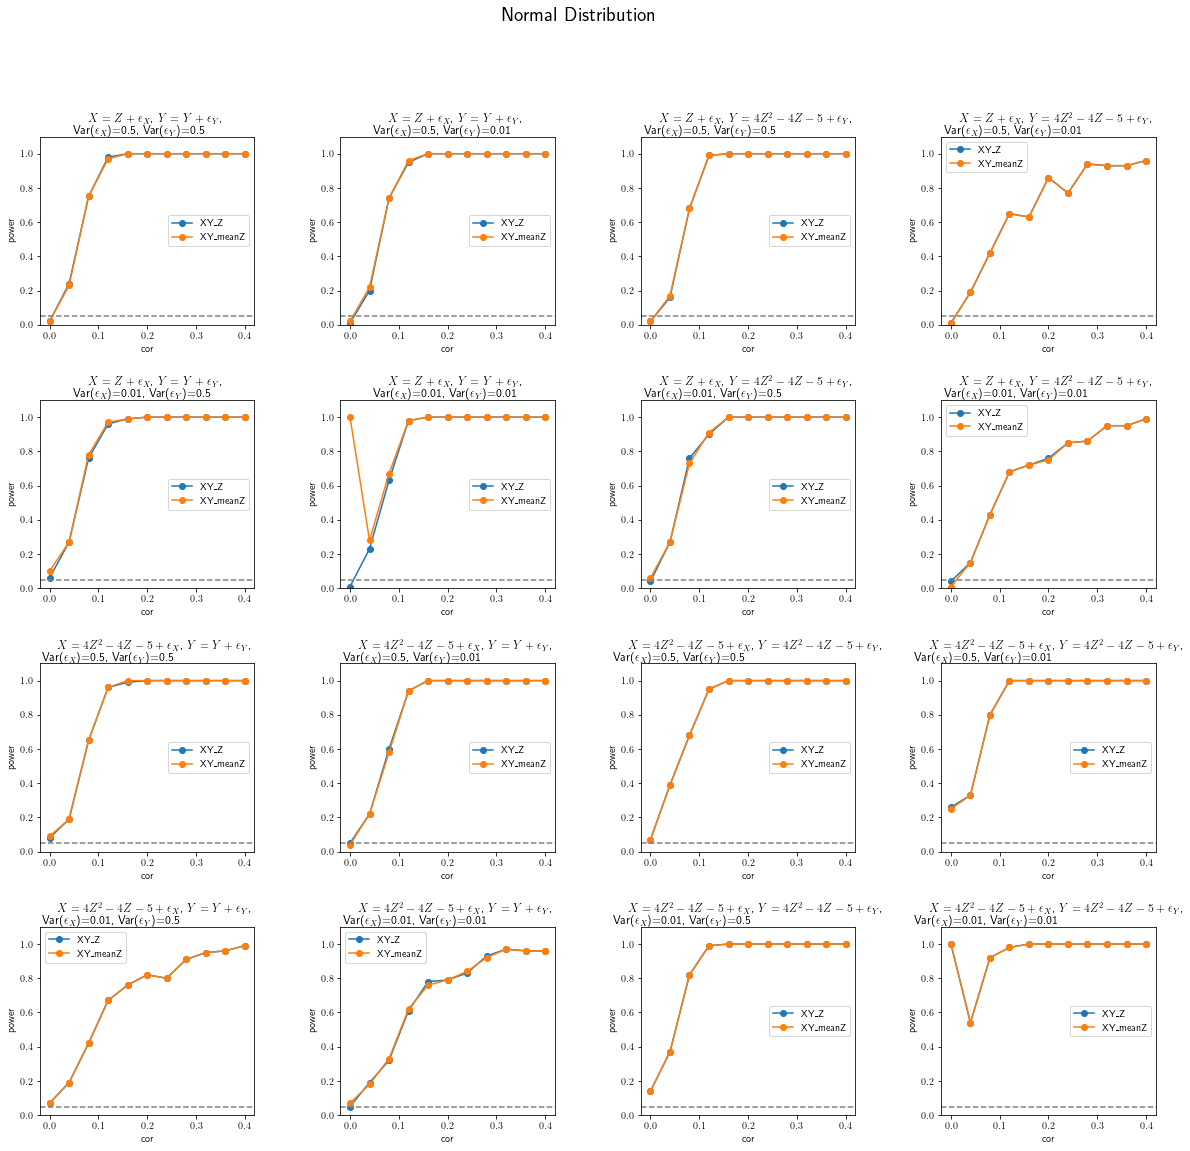

In [27]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_n1000_m50_small_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result.columns = pd.Series(result.columns.astype('float')).round(2).values
                result = result.iloc[[2, 3],:]
                plt.plot(result.T, '-o')
                plt.xlabel("cor")
                if hs == "h0":
                    plt.ylabel("power")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
                #plt.xticks(result.columns, np.arange(11)/10)
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

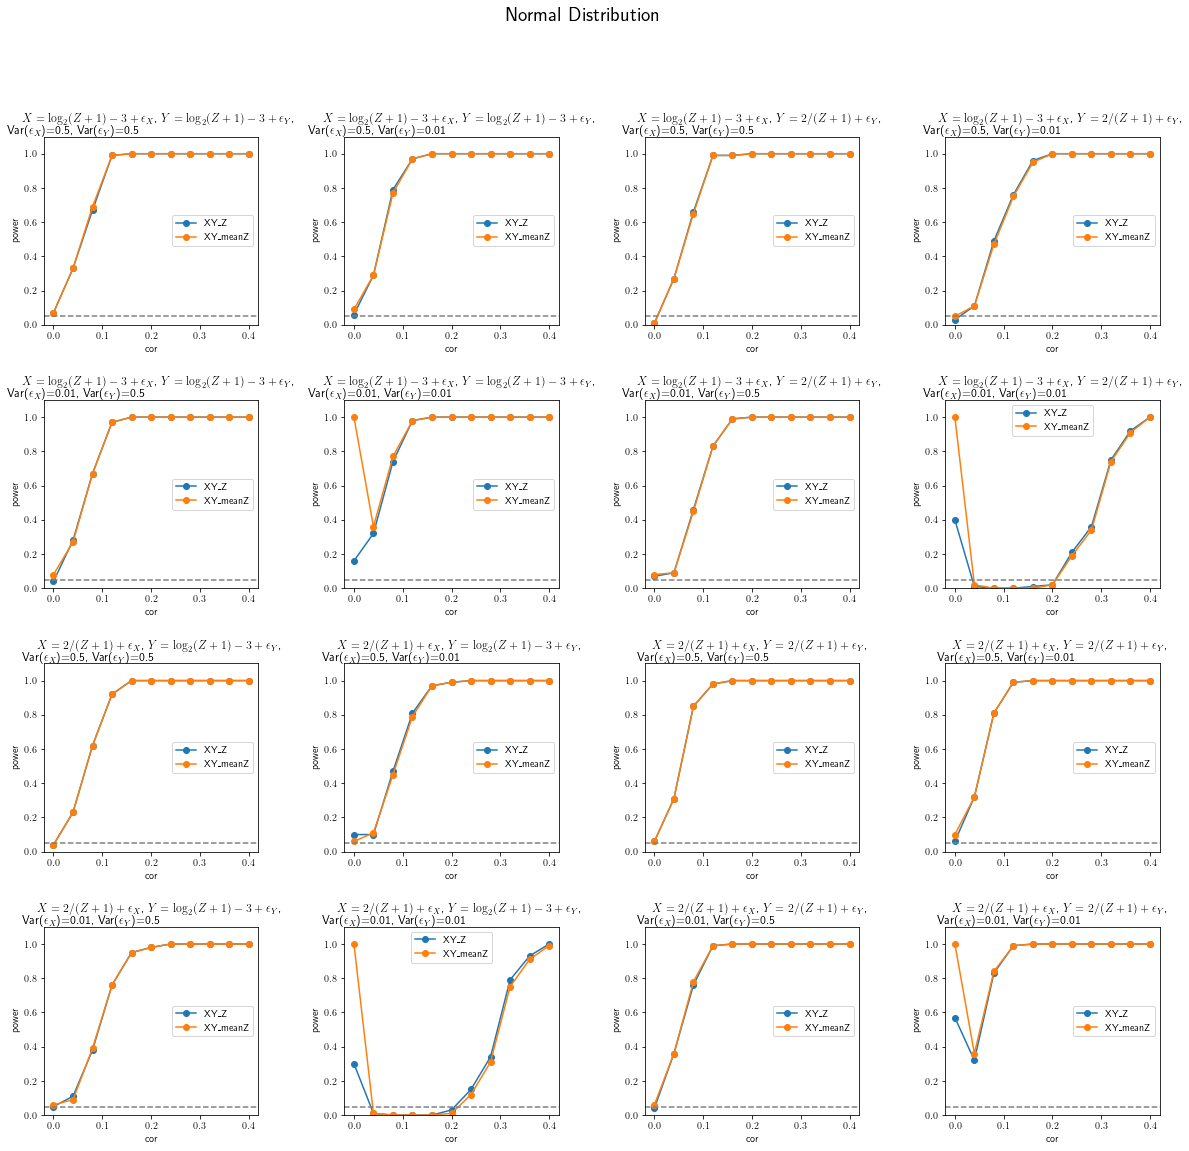

In [28]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_n1000_m50_small_x_func_"+str(xf+2)+"_"+str(yf+2)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[[2,3],:]
                result.columns = pd.Series(result.columns.astype('float')).round(2).values
                plt.plot(result.T, '-o')
                plt.xlabel("cor")
                if hs == "h0":
                    plt.ylabel("power")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf+2], yfuns[yf+2], vxs[vx1], vys[vy1]))
                #plt.xticks(result.columns, np.arange(11)/10)
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

 - M = 25

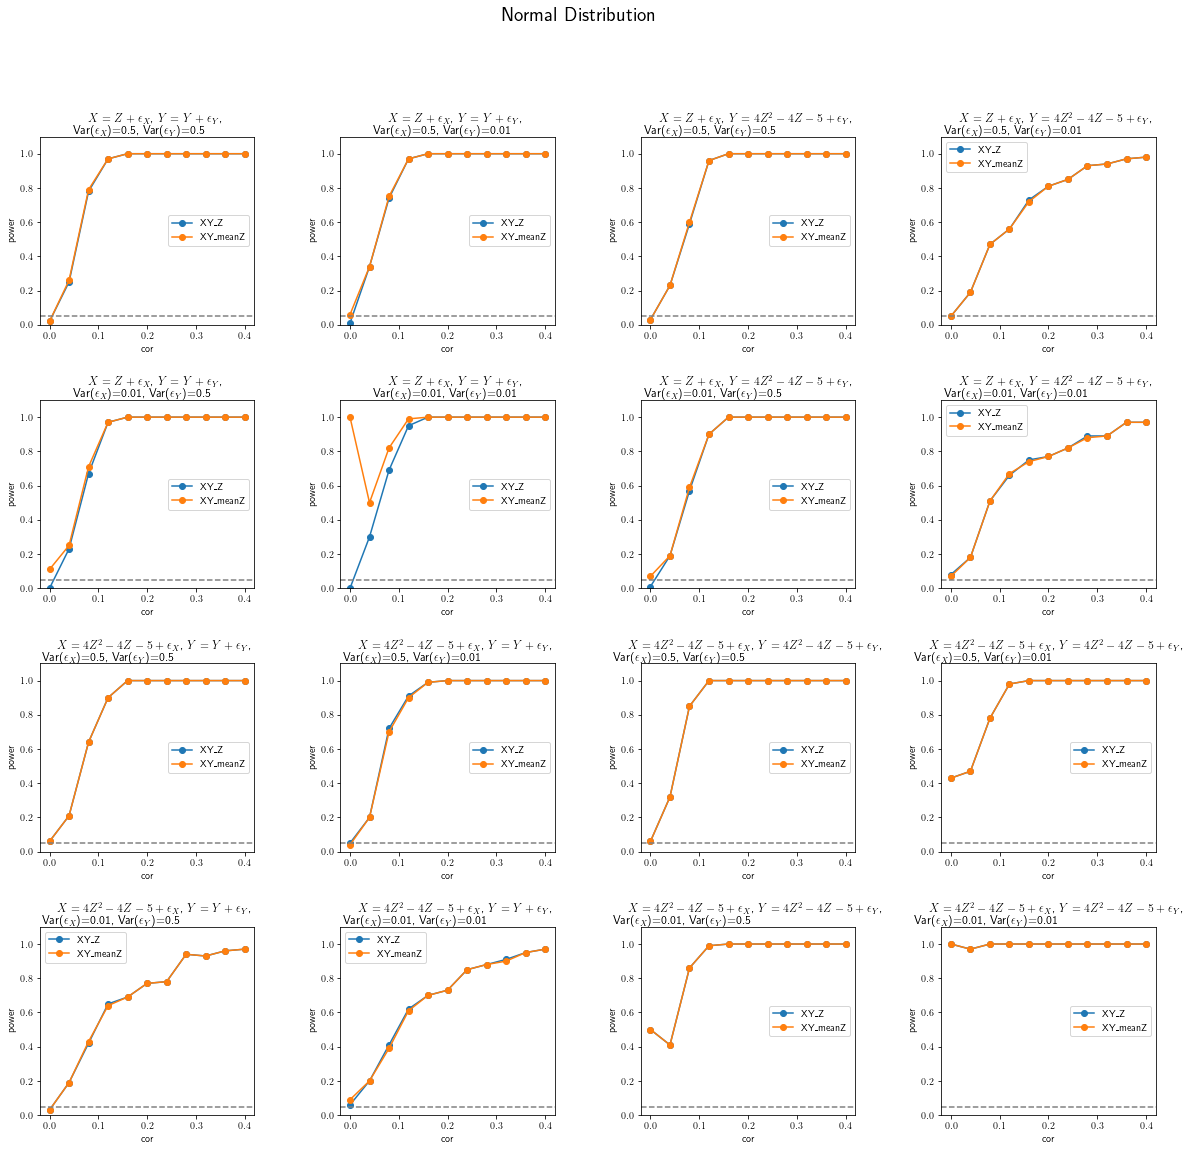

In [26]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_n1000_m25_small_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result.columns = pd.Series(result.columns.astype('float')).round(2).values
                result = result.iloc[[2, 3],:]
                plt.plot(result.T, '-o')
                plt.xlabel("cor")
                if hs == "h0":
                    plt.ylabel("power")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
                #plt.xticks(result.columns, np.arange(11)/10)
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

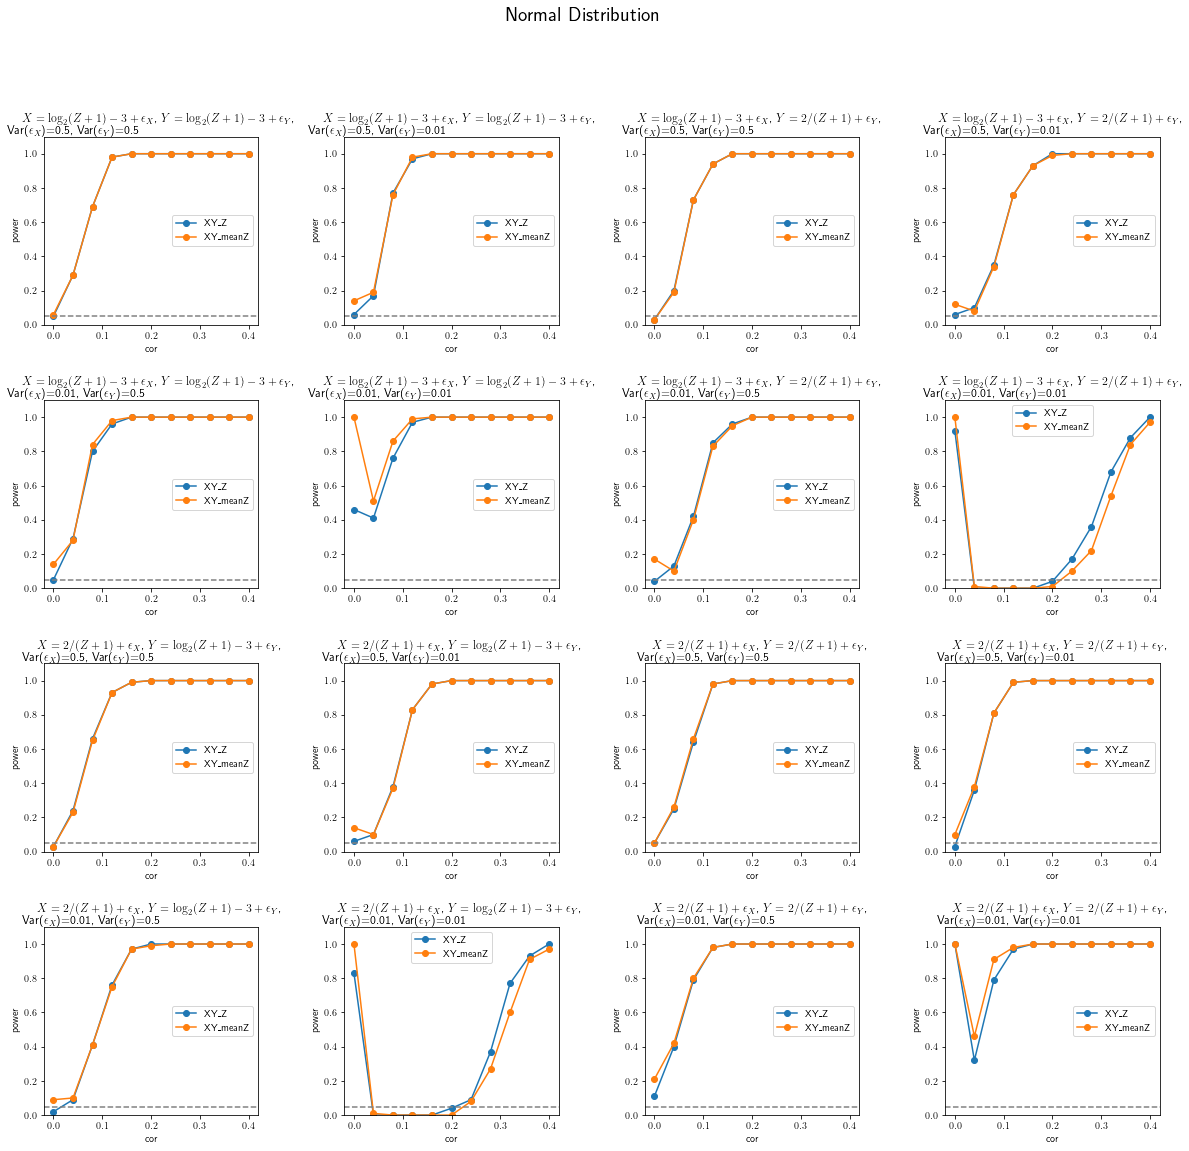

In [25]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_n1000_m25_small_x_func_"+str(xf+2)+"_"+str(yf+2)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result.columns = pd.Series(result.columns.astype('float')).round(2).values
                result = result.iloc[[2,3],:]
                plt.plot(result.T, '-o')
                plt.xlabel("cor")
                if hs == "h0":
                    plt.ylabel("power")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf+2], yfuns[yf+2], vxs[vx1], vys[vy1]))
                #plt.xticks(result.columns, np.arange(11)/10)
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

 - M = 10

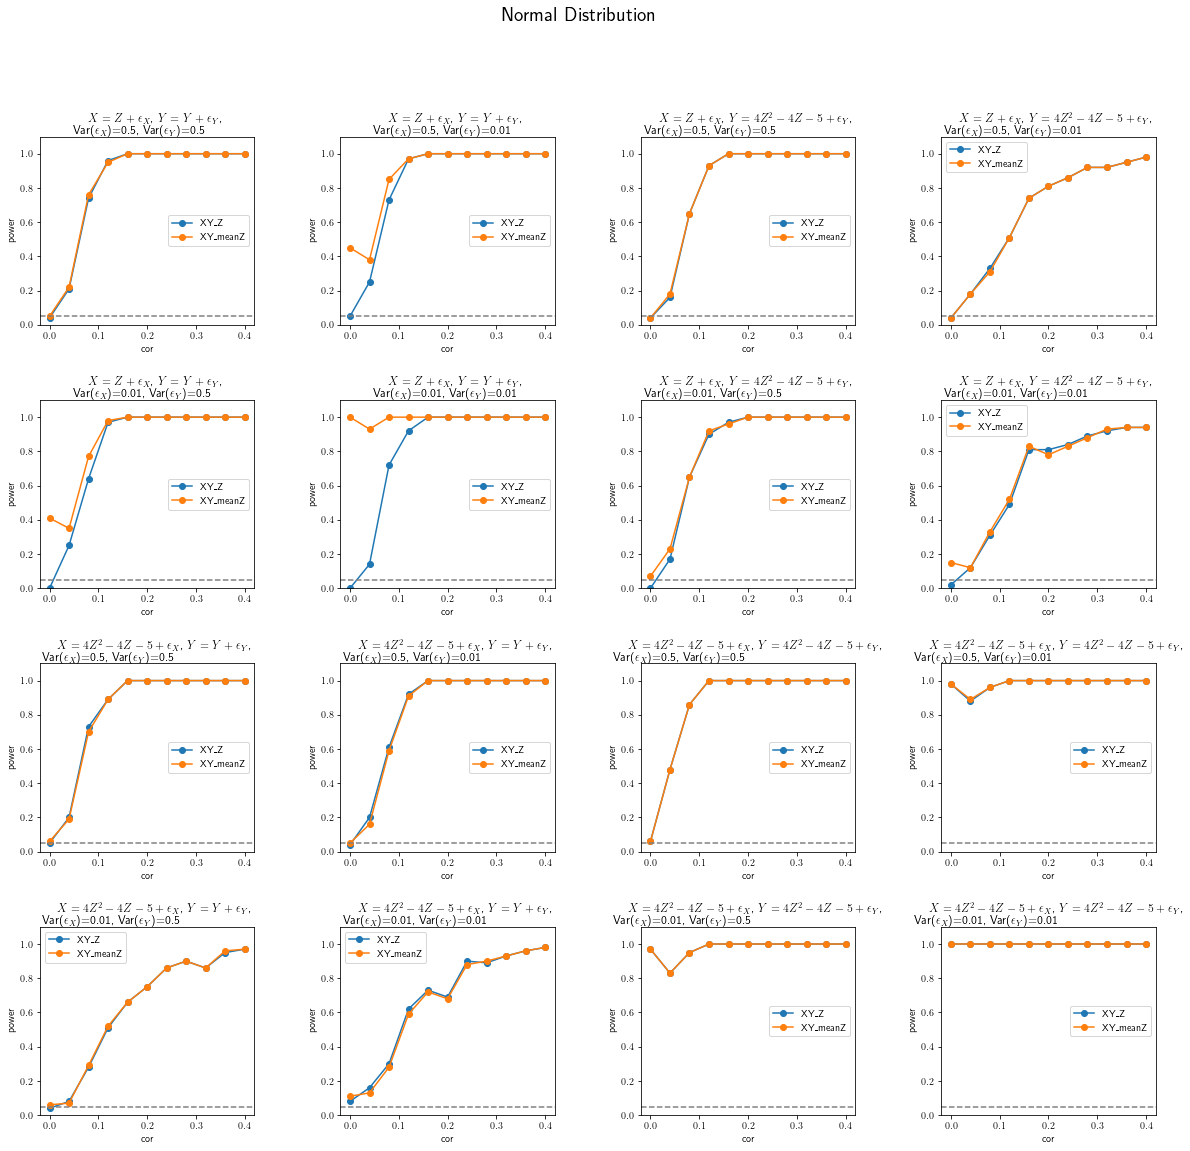

In [23]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_n1000_m10_small_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result.columns = pd.Series(result.columns.astype('float')).round(2).values
                result = result.iloc[[2,3],:]
                plt.plot(result.T, '-o')
                plt.xlabel("cor")
                if hs == "h0":
                    plt.ylabel("power")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
                #plt.xticks(result.columns, np.arange(11)/10)
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

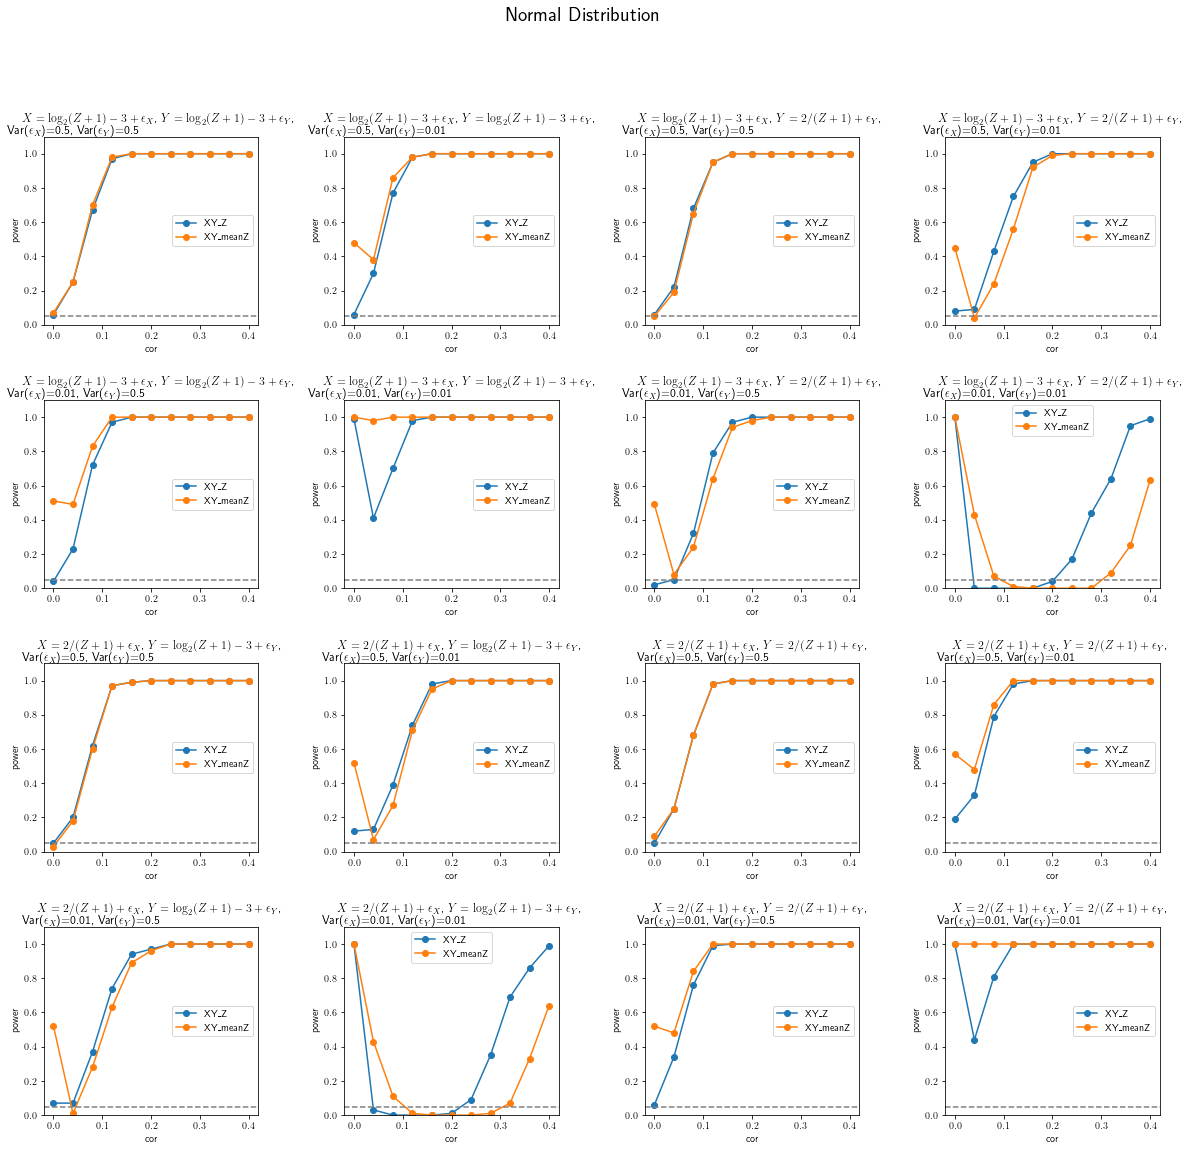

In [24]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_n1000_m10_small_x_func_"+str(xf+2)+"_"+str(yf+2)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result.columns = pd.Series(result.columns.astype('float')).round(2).values
                result = result.iloc[[2,3],:]
                plt.plot(result.T, '-o')
                plt.xlabel("cor")
                if hs == "h0":
                    plt.ylabel("power")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf+2], yfuns[yf+2], vxs[vx1], vys[vy1]))
                #plt.xticks(result.columns, np.arange(11)/10)
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()